# 5. 회귀

## 5.3 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

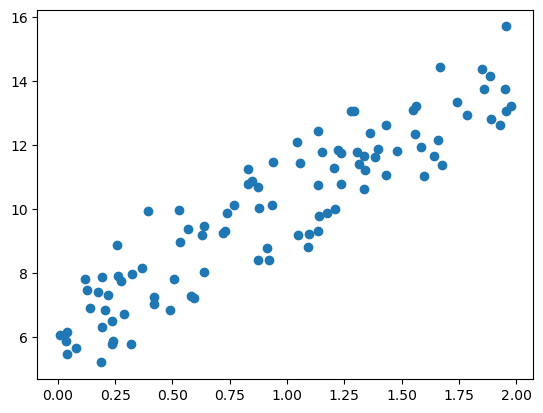

In [3]:
np.random.seed(0)

# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y);

In [4]:
# 비용 함수 get_cost()
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [5]:
## 경사 하강법 gradient_descent(), get_weight_update()
# gradient_descent(): w1, w0 업데이트
# get_weight_update(): y_pred = np.dot(X, w1.T) + w0 계산

In [6]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape과 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0를 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [7]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1, w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022 w0: 6.162
Gradient Descent Total Cost: 0.9935


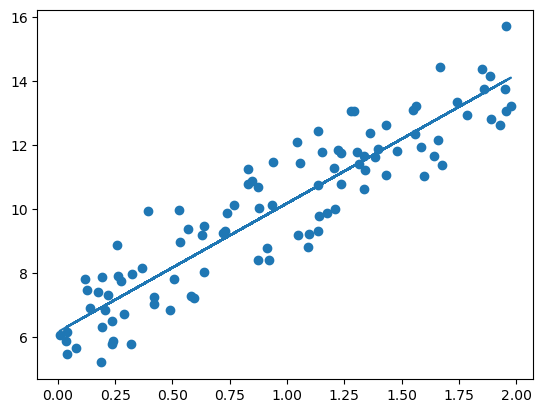

In [9]:
plt.scatter(X, y)
plt.plot(X, y_pred);

 경사 하강법은 모든 학습 데이터에 대해 반복적으로 값을 업데이트하기 때문에 수행시간이 매우 오래 걸린다.
 
 그 때문에 실전에서는 대부분 확률적 경사 하강법 또는 미니 배치 확률적 경사 하강법을 이용한다.
 
 → 일부 데이터만 이용해 w가 업데이트되는 값을 계산

In [10]:
np.random.permutation?
# Randomly permute a sequence, or return a permuted range.
#>>> np.random.permutation(10)
#array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6]) # random

#>>> np.random.permutation([1, 4, 9, 12, 15])
#array([15,  1,  9,  4, 12]) # random

In [11]:
## 미니 배치 확률적 경사 하강법 stochastic_gradient_descent_steps()
# 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937


In [13]:
# 확률적 경사 하강법으로 구한 결과는 경사 하강법으로 구한 결과와 큰 차이가 없음
# 따라서 큰 데이터를 처리할 경우에는 일반적으로 확률적 경사 하강법을 이용한다

## 5.4 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

사이킷런이 지원하는 다양한 선형 모듈 중 규제가 적용되지 않은 선형 회귀를 구현한 클래스인 LinearRegression 이용

### LinearRegression 클래스 - Ordinary Least Squares
- RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
- fit(): X, y 배열을 입력받아 회귀 계수인 W를 coef_ 속성에 저장
- 다중공선성의 경우, 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용 or PCA를 통해 차원 축소를 수행

        class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, ...)
        
        fit_intercept: False로 지정하면 원점 회귀모형
        normalize:  True로 지정하면 회귀수행 전 입력 데이터 세트를 정규화


### 회귀 평가 지표
- MAE, MSE, RMSE, R square, ...
- RMSE : mean_squared_error(squared=True)

- Scoring 함수에 회귀 평가 지표를 적용할 때, 원래의 평가 지표 값에 -1을 곱해 음수를 만들어 주어야 한다!
- 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스 강에 대한 더미 변수(강의 경계에 위치 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
# from sklearn.datasets import load_boston 삭제되어 url을 통해 불러옴
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostonDF = pd.DataFrame(data, columns = columns)
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
bostonDF.info() # 결측치는 없으며 모두 float형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


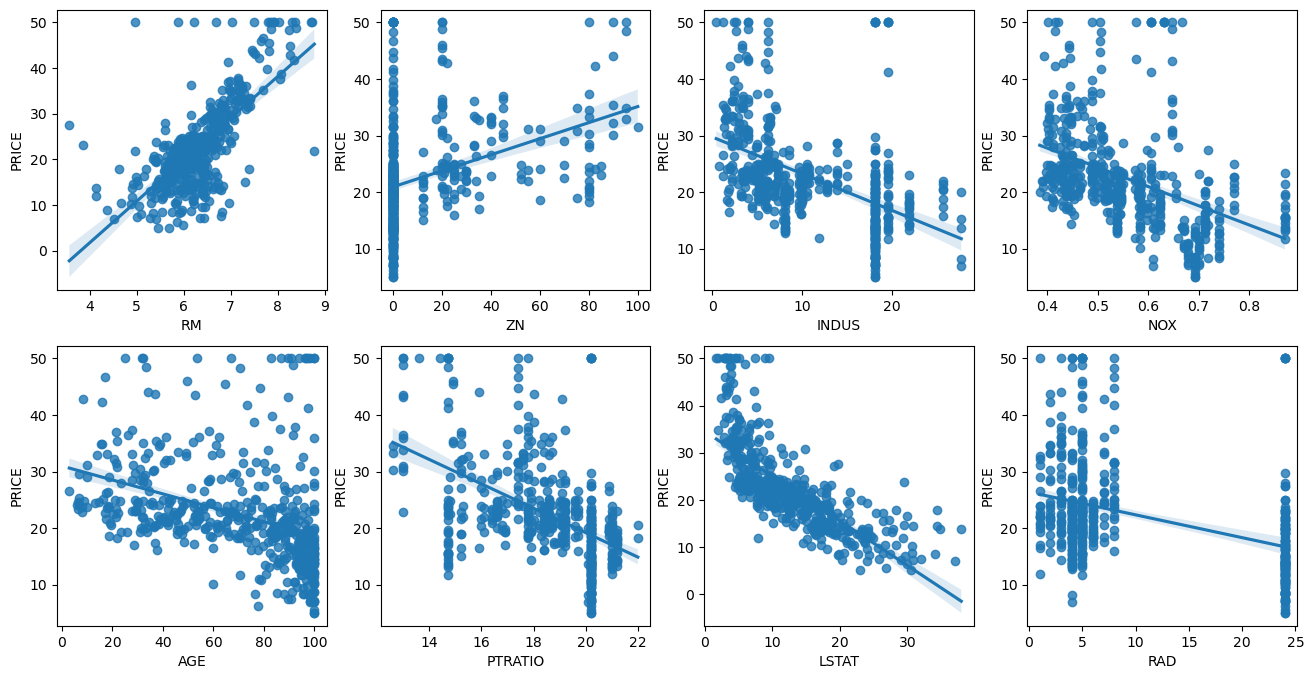

In [17]:
## 각 컬럼이 회귀 결과(PRICE)에 미치는 영향 시각화
# Seaborn regplot(): X, Y 축 값의 산점도 + 선형 회귀 직선
# matplotlib subplots(): 여러 개의 그래프를 한 번에 표현

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [18]:
# RM, LSTAT의 PRICE 영향도가 가장 두드러지게 나타남.
# RM(방 개수): 방의 크기가 클수록 가격 증가 / LSTAT(하위 계층의 비율): 하위 계층의 비율이 적을수록 가격 증가

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [20]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216419
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [21]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [22]:
## 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE, RMSE 측정
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤, 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE: 5.829


 ## 5.5 다항 회귀와 과(대)적합/과소적합 이해
 - 다항(Polynomial) 회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
 - 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀!
 - 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않으므로 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현
 
         `PolynomialFeatures 클래스`: degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환
         → 피처를 Polynomial(다항식) 피처로 변환

In [23]:
# PolynomialFeatures 클래스: [x1, x2] > [1, x1, x2, x1^2, x1x2, x2^2]
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [24]:
# [x1=0, x2=1] > [1, x1=0, x2=1, x1^2=0, x1x2=0, x2^2=1]
# [x1=2, x2=3] > [1, x1=2, x2=3, x1^2=4, x1x2=6, x2^2=9]

In [25]:
## 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도
# y = 1 + 2(x1) + 3(x1^2) + 4(x2^3)

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 # X[:,0] = x1, X[:,1] = x2
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y) # (x1=0, x2=1 → y=5), (x1=2, x2=3, y=125)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [26]:
# 3차 다항식 변환: [x1, x2] > [1, x1, x2, x1^2, x1x2, x2^2, x1^3, x1^2x2, x1x2^2, x2^3]
poly_ptr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]
Polynomial 회귀 계수
 [0.   1.94 1.94 3.87 5.81 7.74]
Polynomial 회귀 Shape : (6,)


In [27]:
# 원래 다항식의 계수값 [1,2,0,3,0,0,0,0,0,4]와 차이가 있긴 하지만 다항 회귀로 근사하고 있음을 알 수 있다.

In [28]:
## 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항 회귀의 차수(degree)를 높일수록 복잡한 피처 간 관계까지 모델링이 가능하다.
- 다만, 학습 데이터에만 너무 맞춘 학습이 이뤄져 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어질 수 있다. (과적합)

In [29]:
## 과적합 예시
# X: 30개의 임의의 데이터, y: X의 코사인 값 + 약간의 잡음 변동값

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_func()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [30]:
plt.setp? # Set one or more properties on an `.Artist`, or list allowed values.

SyntaxError: invalid syntax (1246950499.py, line 1)

In [ ]:
PolynomialFeatures?


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE 는 182493841.77 입니다.


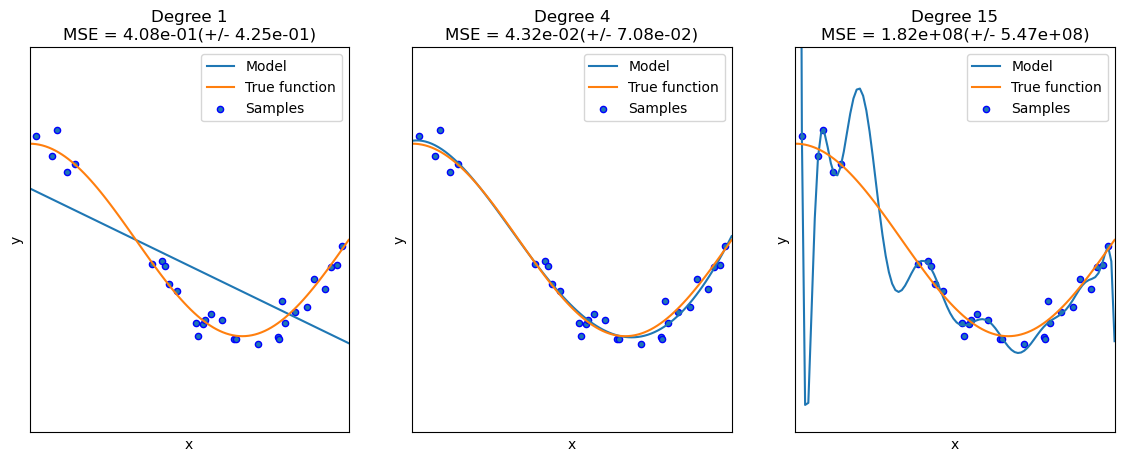

In [31]:
# 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교 (MSE)
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 반환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                        ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트의 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '-', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    
    plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show();

In [32]:
# Degree 1: 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 보임
# Degree 2: 실제 데이터 세트와 유사, 학습 데이터의 패턴을 잘 반영하고 있음 > 균형 잡힌 모델
# Degree 3: 데이터 세트의 변동 잡음값까지 지나치게 반영한 결과, 터무니 없는 오류값 발생 (과적합)

### 편향-분산 트레이드 오프 (Bias-Variance Trade off)

- 고편향성: 매우 단순화된 모델 / 지나치게 한 방향성으로 치우친 경향
- 고분산성: 매우 복잡한 모델 / 지나치게 높은 변동성

<img src="https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png" width="500" height="500"/>

- 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다 ! (trade-off)
- 편향이 높으면 분산은 낮아짐 (과소적합)
- 분산이 높으면 편향은 낮아짐 (과적합)

→ 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjJfMjMg/MDAxNTYzNzk3Nzc0NDcw.VdLhR996Ys1uG0V5R_9UD6Wg4jZL3dI_3Phnu13mdY4g.OkHU-OcxcVk4R4KU7bI_xHCUEKh8Gfs_stvNrmBH02Ig.PNG.ckdgus1433/image.png?type=w800" width="700" height="700"/>

## 5.6 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- RSS 최소화 + 과적합 방지를 위해 회귀 계수 값이 커지지 않도록 !
- 비용 함수 목표 = Min( RSS(W) + alpha * ||W|| )
- alpha 값을 크게 하면, 회귀 계수 감소시켜 과적합을 개선 / alpha 값을 작게 하면, 학습 데이터 적합에 초점

→ 규제
- L1 방식: W의 절댓값에 대해 패널티를 부여 ( 영향력이 크지 않은 회귀 계수 값을 0으로 변환 ) = 라쏘 회귀
- L2 방식: W의 제곱에 대해 패널티를 부여 = 릿지 회귀

### 릿지 회귀 (L2 규제)
- Ridge 클래스를 통해 구현
- alpha 값이 클수록 회귀 계수는 지속적으로 작아지지만, 0이 되지는 않음

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518


In [39]:
## alpha 값에 따른 RMSE와 회귀 계수 값의 변화
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


In [40]:
# alpha 100 일 때, 가장 좋음

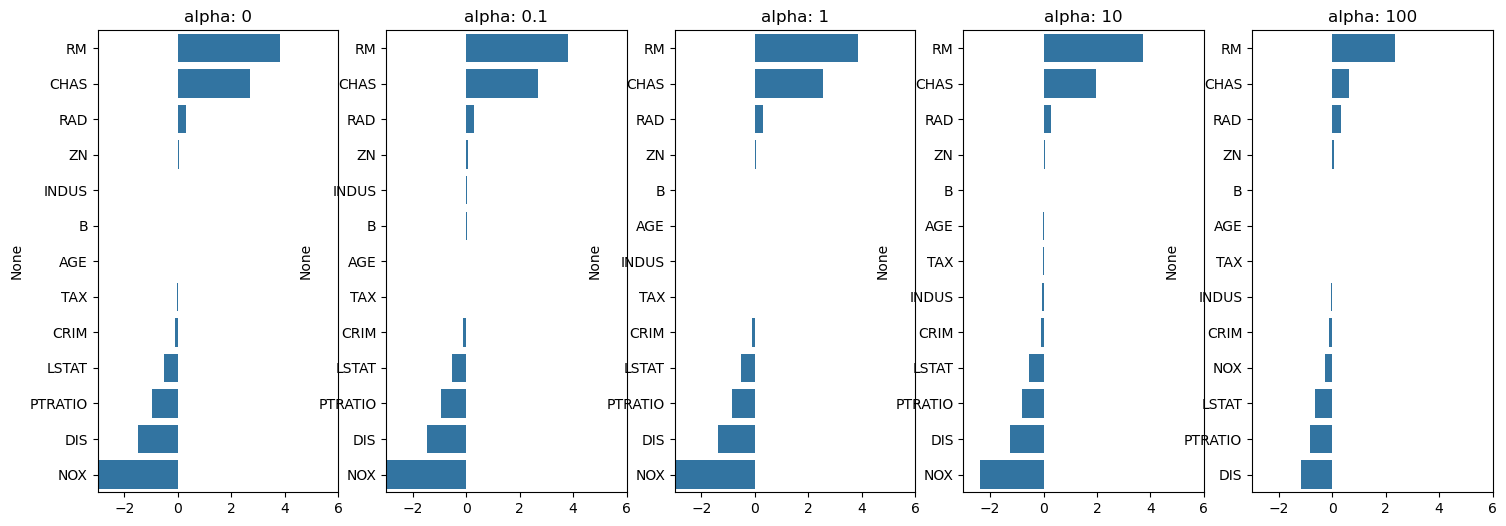

In [43]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [44]:
# alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐

In [45]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: ' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀 (L1 규제)
- Lasso 클래스를 통해 구현
- 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거 (피처 선택의 특성)

In [48]:
from sklearn.linear_model import Lasso, ElasticNet # ElasticNet 뒤에서 설명

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame에 칼럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha: ' + str(param)
            coeff_df[colname] = coeff
            
    return coeff_df
# end of get_linear_regre_eval

In [49]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [51]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha: ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 엘라스틱넷 회귀
- ElasticNet 클래스를 통해 구현 ( a * L1 + b * L2 )
- alpha 파라미터 값: a+b, l1_ratio 파라미터 값: a/(a+b)
- L2 규제와 L1 규제를 결합한 회귀
- 라쏘 회귀는 서로 상관관계가 높은 피처들의 경우, 이들 중 중요 피처만을 셀렉하고 다른 피처들은 모두 회귀계수를 0으로 만든느 성향이 강함
- 이를 완화하기 위해 L2 규제를 추가
- 단점: 상대적으로 긴 수행시간

In [52]:
# l1_ratio를 0.7로 고정한 상태
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [53]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha: ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


### 선형 회귀 모델을 위한 데이터 변환
- 선형 회귀의 경우, 최적 하이퍼 파라미터를 찾아내는 것 몾지않게 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요함
- 선형 모델은 일반적으로 피처와 타깃값 간 선형 관계가 있다고 가정 + 피처값과 타깃값의 분포가 정규 분포 형태를 매우 선호
- 왜곡(Skew)된 형태일 경우, 예측 성능에 부정적 영향을 미칠 가능성이 있음

→ 선형 회귀 모델 적용 전, 데이터에 대한 스케일링/정규화 작업 필요
1. StandardScaler, MinMaxScaler : 예측 성능 향상을 기대하기 어려움
2. 1번을 통한 예측 성능의 향상이 없다면, 스케일링/정규화된 데이터 세트에 다시 다항 특성을 적용하여 변환 : 피처 수가 많을 경우 과적합
3. 로그 변환 (log 함수 적용) : 제일 많이 쓰는 방식

- 타깃값은 일반적으로 로그 변환을 적용 (변환 값을 다시 원본 값으로 변환하기 쉽도록 + 예측 성능 향상이 검증됨)

In [54]:
## 스케일링/정규화 작업 별 예측 성능 측정 get_scaled_data()
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method: 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log)
# p_degree: 다항식 특성 추가, 2 이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard': scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax': scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log': scaled_data = np.log1p(input_data)
    else: scaled_data = input_data
    
    if p_degree != None:
        sclaed_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [55]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

In [59]:
# 5 개 방식으로 변환 > 원본 그대로, 표준 정규분포, 표준 정규분포 + 다항식 특성,
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', None),
                ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형: Log, Polynomial Degree: None
a

In [60]:
# 표준 정규분포, 최솟값/최댓값 정규화: 성능상의 개선 X
# 표준 정규분포, 최솟값/최댓값 정규화 + 2차 다항식 변환: 성능 개선 but 피처 개수 많을 경우 적용하기 어려움
# 로그변환: 모두 좋은 성능 향상

## 5.7 로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 차이점: 선형 함수의 회귀 최적선을 찾는 것이 아닌, 시그모이드(Sigmoid) 함수 최적선을 찾고, 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정

<img src="https://taewanmerepo.github.io/2017/09/sigmoid/post.jpg" width="500" height="500"/>

- y 값은 항상 0과 1 사이 값을 반환
- 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어나 이진분류의 기본 모델로 사용하는 경우가 많음
- 희소한 데이터 세트 분류에도 뛰어난 성능을 보여 텍스트 분류에서도 자주 사용됨

### LogisticRegression 클래스
#### 회귀 계수 최적화 (solver  파라미터)
- lbfgs: 메모리 공간 절약 가능, CPU 코어 수가 많다면 최적화를 병렬로 수행 가능
- liblinear : 다차원이고 작은 데이터 세트에서 효과적으로 동작, 국소최적화 이슈, 병렬 최적화 불가능 
- newton-cg : 정교한 최적화, 대용량 데이터에서는 속도가 매우 느림
- sag : Stochastic Average Gradient, 경사하강법 기반의 최적화, 대용량 데이터에서도 빠르게
- saga : sag와 유사한 최적화 방식, L1 정규화를 가능하게 함

- lbfgs, liblinear를 선택하는 것이 대부분 ( 다양한 solver 값 간 성능 차이는 미미함 )

#### 주요 하이퍼 파라미터
- penalty: 규제 유형 설정 > 'ㅣ1', 'ㅣ2'(default)
- C: 규제 강도 조절하는 alpha 값의 역수, C 값이 작을수록, alpha는 커지고 규제 강도는 커짐
- Liblinear, saga의 경우, L1, L2 규제가 모두 가능하지만 lbfgs, newton-cg, sag의 경우는 L2 규제만 가능

### 암 여부 판단 - 위스콘신 유방암 데이터 세트

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 선형 회귀 계열인 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능에 영향을 받을 수 있음
# StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [70]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc: {1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

accuracy: 0.977, roc_auc: 0.972


In [71]:
## 다양한 solver 값 적용
# 일부 solver는 최적화에 상대적으로 많은 반복 횟수가 필요 > max_iter = 600 ( 최적화 알고리즘 수렴할 때까지 최대 600번까지 반복 )
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver: {0}, accuracy: {1:.3f}, roc_auc: {2:.3f}'.format(solver,
                                                                    accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

solver: lbfgs, accuracy: 0.977, roc_auc: 0.972
solver: liblinear, accuracy: 0.982, roc_auc: 0.979
solver: newton-cg, accuracy: 0.977, roc_auc: 0.972
solver: sag, accuracy: 0.982, roc_auc: 0.979
solver: saga, accuracy: 0.982, roc_auc: 0.979


In [72]:
## GridSearchCV를 이용해 위스콘신 데이터 세트에서 solver, penalty, C 최적화
from sklearn.model_selection import GridSearchCV

params = {'solver' : ['liblinear', 'lbfgs'],
         'penalty' : ['l2', 'l1'],
         'C' : [0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터: {0}, 최적 평균 정확도: {1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도: 0.979


## 5.8 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 4장의 분류 트리 + 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등 모든 트리 기반의 알고리즘은 분류 뿐만 아니라 회귀로 가능
- 트리 생성이 CART (Classification and Regression Trees) 알고리즘에 기반하고 있기 때문
- CART 기반의 회귀 수행을 위한 Estimator 클래스 사용

<img src="https://cdn.imweb.me/upload/S202209290989f2bea459e/6f05351e5f1d1.png" width="500" height="500"/>

### RandomForestRegressor를 이용한 보스턴 주택 가격 예측

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [75]:
# from sklearn.datasets import load_boston 삭제되어 url을 통해 불러옴
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bostonDF = pd.DataFrame(data, columns = columns)
bostonDF['PRICE'] = target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [77]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE: 4.423


In [78]:
## 다양한 트리 기반 알고리즘을 이용해 예측하기 위한 get_model_cv_prediction()
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimator=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.959
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646


<Axes: xlabel='None', ylabel='None'>

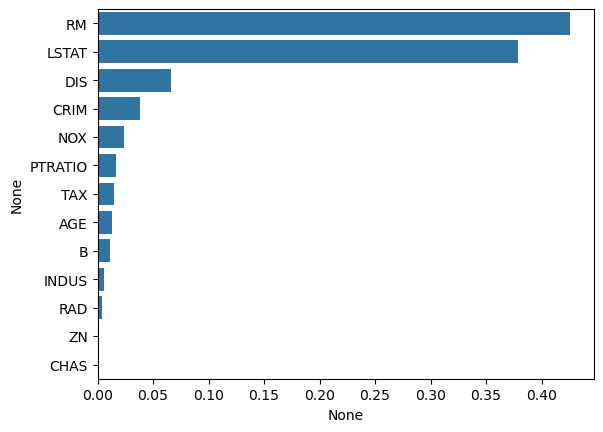

In [81]:
# coef_ 속성 없음. 대신 feature_importances_를 이용해 피처별 중요도를 알 수 있음
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [83]:
pd.DataFrame.sample? # Return a random sample of items from an axis of object.

(100, 2)


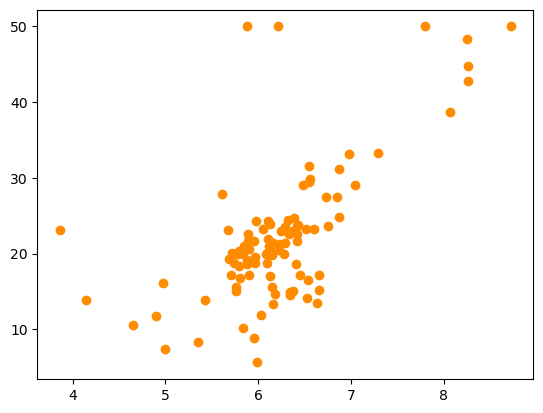

In [84]:
## 결정 트리의 하이퍼 파라미터 max_depth의 크기를 변화하며 어떻게 회귀 트리 예측선이 변화하는지 확인
# 2차원 평면상에서 표현하기 위해 단 1개의 변수만 추출 > Price와 가장 양의 상관성이 높은 RM
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [86]:
# DecisionTreeRegressor의 max_depth를 각각 2, 7로
# RM 값을 4.5 ~ 8.5까지의 100개의 테스트 데이터 세트로 제공했을 때의 예측값

import numpy as np
from sklearn.linear_model  import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

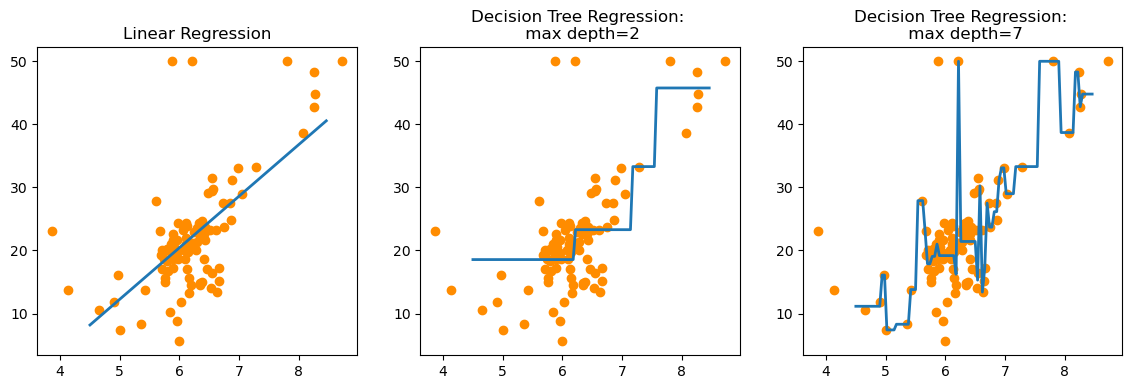

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X 축 값을 4.5 ~ 8로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:3', linewidth=2)

In [88]:
# 분할되는 데이터 지점에 따라 브랜치를 만들며 계단 형태로 회귀선을 만든다.
# DecisionTreeRegressor의 max_depth=7인 경우, 과적합되기 쉬운 모델이 되었음